### About Dataset
    This dataset focuses on one of the central topics in customer relationship management (CRM): transfer of valuable customers to a competitor. 
    Customer retention rate has a strong impact on customer lifetime value, and understanding the true value of a possible customer churn will help the company in its customer relationship management. 
    Customer value analysis along with customer churn predictions will help marketing programs target more specific groups of customers. 
    The result of the case study show that using conventional statistical methods to identify possible churners can be successful.
### Identify the problem
    
    Due to different reasons a customer may leave the bank and can go for a competitor. From the dataset we can get the details whether the customer will leave the bank or not based on the features and can predict under which condition the customer leaves the bank.
    In this dataset we have 10 important features which basically helps us to predict whether the customer exits the bank or not.

### Expected Outcome

    The expected outcome of the dataset are
    * 1 = representing exit of customer
    * 0 = representing customer satisfied with the bank service

### Objective
    Since the labels in the data are discrete, the predication falls into two categories, i.e. Exit or staying. Thus, the goal is to classify whether the customer are leaving the bank or not. To achieve this we have used Deep learning classification methods to fit a function that can predict the discrete class of new input.

#### Starting with Importing all the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing the dataset
df = pd.read_csv("BankCustomers.csv")

In [3]:
# Visualization of data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Getting the shape of the data
df.shape

(10000, 14)

In [5]:
# to get all the information about all the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# columns of the dataset
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
# To get all the details
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [8]:
for item in df.columns:
    print(item, ": " )
    print(df[item].unique())
    print(df[item].value_counts())
    print("************************************************")

RowNumber : 
[    1     2     3 ...  9998  9999 10000]
2047    1
5424    1
1338    1
7481    1
5432    1
       ..
2716    1
8857    1
4759    1
6806    1
2049    1
Name: RowNumber, Length: 10000, dtype: int64
************************************************
CustomerId : 
[15634602 15647311 15619304 ... 15584532 15682355 15628319]
15812607    1
15741078    1
15635776    1
15740223    1
15738174    1
           ..
15743714    1
15639265    1
15641312    1
15684319    1
15695872    1
Name: CustomerId, Length: 10000, dtype: int64
************************************************
Surname : 
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Bateman      1
Miles        1
Cawood       1
Beers        1
Brazenor     1
Name: Surname, Length: 2932, dtype: int64
************************************************
CreditScore : 
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 58

In [9]:
# To check if there is any null values present in the dataset
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

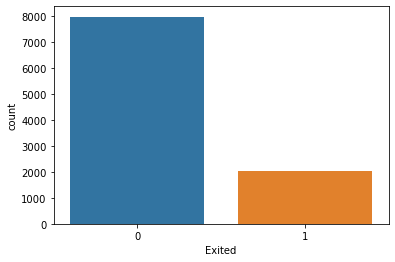

In [10]:
sns.countplot(data = df, x ="Exited")

#### Removing columns from dataset that are not required

In [11]:
df.drop(["RowNumber","CustomerId","Surname"],axis = 1, inplace = True)

In [12]:
#Columns after removal
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

#### One Hot Encoding for Geography and Gender

In [13]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [14]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [15]:
# Convert Categorical feature in to dummy Variables
states = pd.get_dummies(df["Geography"], drop_first = True)
gender = pd.get_dummies(df["Gender"], drop_first = True)

In [16]:
df = pd.concat([df, states, gender], axis = 1)

In [17]:
df.drop(["Geography", "Gender"], axis =1, inplace = True)

In [18]:
df.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.0,1,1,1,101348.88,1,0,0,0


In [19]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Germany', 'Spain',
       'Male'],
      dtype='object')

<AxesSubplot:>

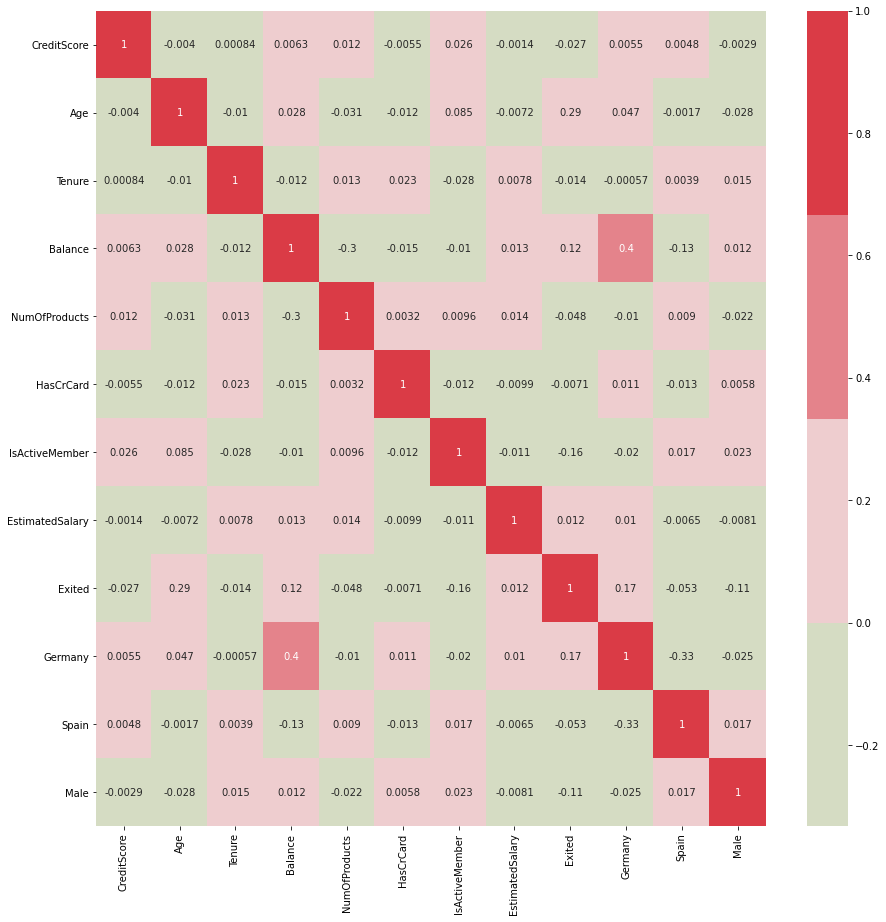

In [20]:
correlation = df.corr()
plt.figure(figsize = (15,15))
cmap= sns.diverging_palette(100, 10)
sns.heatmap(correlation, annot = True, cmap =cmap, center = 0)

#### Getting the Independent and Dependent Features

In [21]:
X = df.loc[:,['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary', 'Germany', 'Spain','Male']]
y = df.loc[:, "Exited"]

In [22]:
X.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.0,1,1,1,101348.88,0,0,0


In [23]:
y.head(1)

0    1
Name: Exited, dtype: int64

#### Dividing records in training and testing sets with test size 20% of whole dataset

In [24]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Performing Feature Scaling pn X_train and X_test

In [25]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Creating the ANN model

In [26]:
# Let's create the ANN Model
import keras
from keras.models import Sequential # to go through the layers sequentially
from keras.layers import Dense

In [27]:
# Initializing the ANN
classifier = Sequential()

In [28]:
# Adding the input layer and first Hidden Layer
classifier.add(Dense(activation="relu", input_dim = 11, units = 6,kernel_initializer= "uniform"))

# Adding the second Hidden Layer
classifier.add(Dense(activation="relu", units = 5, kernel_initializer= "uniform"))

# Adding the third Hidden Layer
classifier.add(Dense(activation="relu", units = 3, kernel_initializer= "uniform"))

# Adding the output layer
classifier.add(Dense(activation = "sigmoid", units =1, kernel_initializer="uniform"))

In [29]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 35        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [31]:
# Fitting the ANN to thee training set
classifier.fit(X_train, y_train, batch_size=100, epochs = 10)

Epoch 1/10
80/80 [==============================] - 1s 848us/step - loss: 0.6867 - accuracy: 0.7955
Epoch 2/10
80/80 [==============================] - 0s 848us/step - loss: 0.6458 - accuracy: 0.7953
Epoch 3/10
80/80 [==============================] - 0s 848us/step - loss: 0.5202 - accuracy: 0.8012
Epoch 4/10
80/80 [==============================] - 0s 835us/step - loss: 0.4450 - accuracy: 0.8002
Epoch 5/10
80/80 [==============================] - 0s 835us/step - loss: 0.4411 - accuracy: 0.7955
Epoch 6/10
80/80 [==============================] - 0s 861us/step - loss: 0.4372 - accuracy: 0.7950
Epoch 7/10
80/80 [==============================] - 0s 823us/step - loss: 0.4286 - accuracy: 0.8031
Epoch 8/10
80/80 [==============================] - 0s 853us/step - loss: 0.4365 - accuracy: 0.7932
Epoch 9/10
80/80 [==============================] - 0s 884us/step - loss: 0.4259 - accuracy: 0.8015
Epoch 10/10
80/80 [==============================] - 0s 862us/step - loss: 0.4308 - accuracy: 0.7926

In [32]:
# Making the Prediction and Evaluating the model
# Predicting the Test Set Results
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)

####  evaluating the accuracy score and confusion matrix

In [33]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
print("Accuracy Score : ", accuracy_score(y_test, y_pred))

Accuracy Score :  0.7975
